In [1]:
from rivgraph.classes import river
from rivgraph import im_utils as iu
import matplotlib.pyplot as plt
from rivgraph.classes import rivnetwork
from rivgraph import mask_to_graph as m2g
from rivgraph.rivers import river_utils as ru
from rivgraph import geo_utils as gu
import os
from datetime import datetime
import csv
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString, Polygon
from rivgraph import ln_utils as lnu
from rivgraph import io_utils as io
import networkx as nx
from scipy.ndimage import distance_transform_edt

### generates mesh before calculating eBI (entropic Braiding Index)

---------- New Run ----------


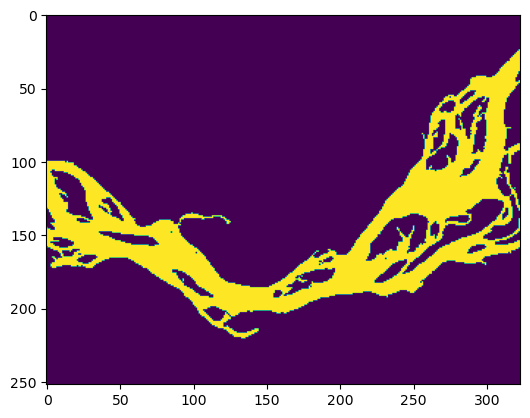

In [11]:
# Define the path to the georeferenced binary image.
mask_path = r'C:\Users\Feifei\PHD\Landsat_watermasks\ebi_results\Fraser_Hope\Fraser_cropped.tif'
# Results will be saved with this name
name = 'Fraser' 
# Where to store RivGraph-generated geotiff and geovector files.
results_folder = r'C:\Users\Feifei\PHD\Landsat_watermasks\ebi_results\Fraser_Hope\rivgraph'
# Set the exit sides of the river relative to the image. 
es = 'EW' # The first character is the upstream side
# Boot up the river class! We set verbose=True to see progress of processing.
River = river(name, mask_path, results_folder, exit_sides=es, verbose=True) 
plt.imshow(River.Imask)

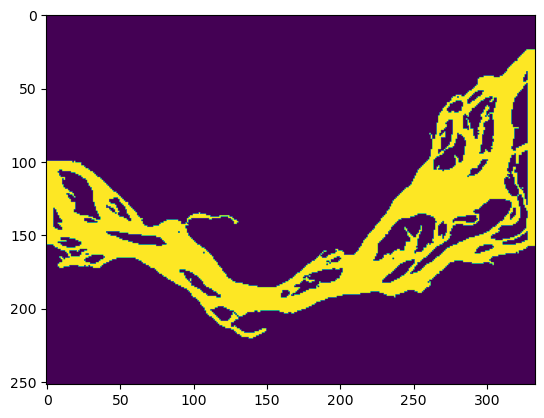

In [12]:
# Remove isolated water bodies, pad river
River.Imask= iu.largest_blobs(River.Imask, nlargest=1, action='keep')
Imask_blob, pads = m2g.cap_river_im(River.Imask, es, capsize=5)
# Fill small holes in the mask. 
River.Imask=iu.fill_holes(River.Imask, maxholesize=5)
plt.imshow(Imask_blob)

In [13]:
#compute mesh - done once per river
River.compute_mesh(buf_halfwidth=5000, smoothing=0.5, grid_spacing=1000)
River.to_geovectors('centerline', ftype='json')
River.to_geovectors('mesh', ftype='json')

Computing centerline...
centerline computation is done.
Skeletonizing mask...
skeletonization is done.
Resolving links and nodes...
links and nodes have been resolved.
Computing distance transform...
distance transform done.
Computing link widths and lengths...
link widths and lengths computed.
Generating mesh...
mesh generation is done.
